## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/Zoo.csv")

In [ ]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


## Visualizations

<Axes: xlabel='milk'>

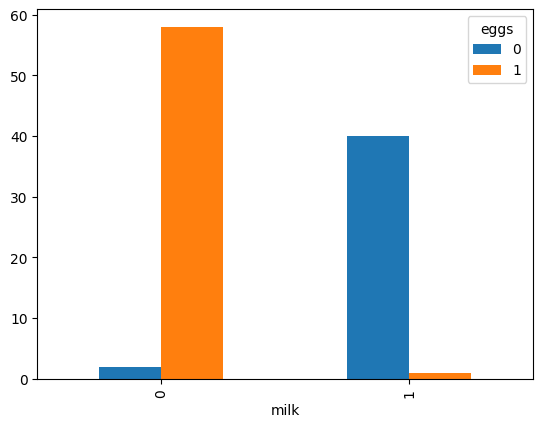

In [ ]:
pd.crosstab(data.milk,data.eggs).plot(kind="bar")

<Axes: ylabel='count'>

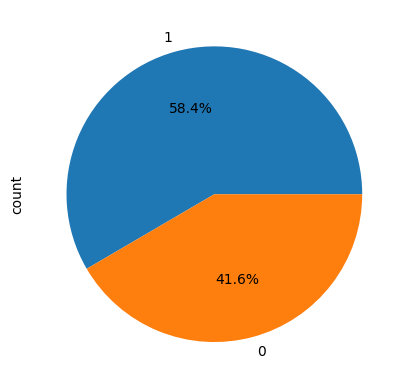

In [ ]:
data["eggs"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

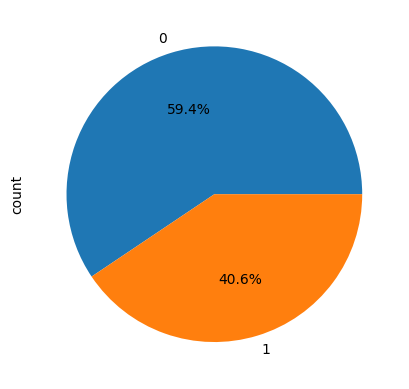

In [ ]:
data["milk"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

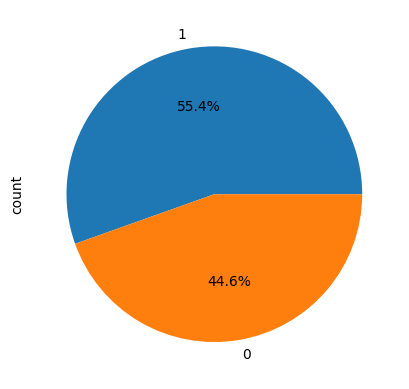

In [ ]:
data["predator"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

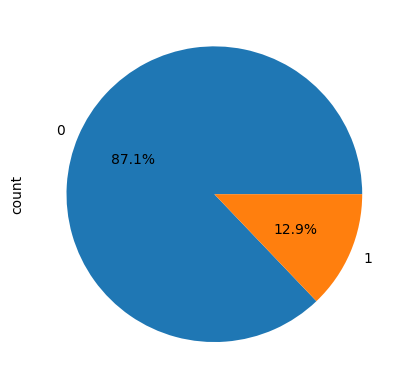

In [ ]:
data["domestic"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

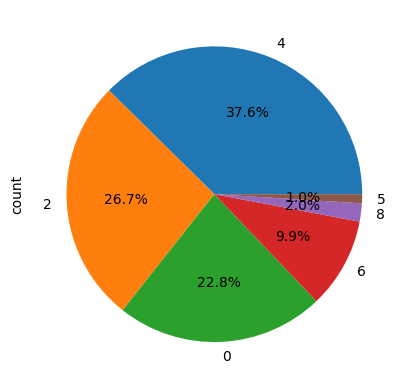

In [ ]:
data["legs"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

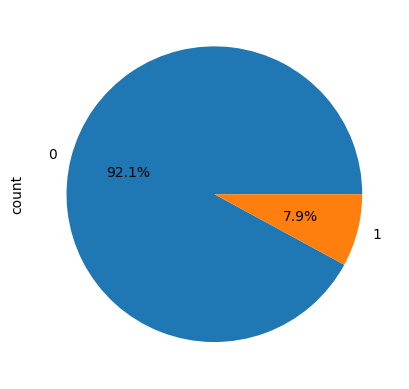

In [ ]:
data["venomous"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

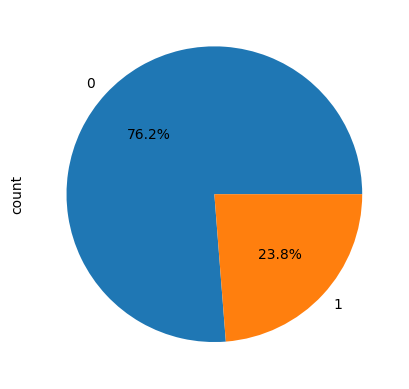

In [ ]:
data["airborne"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

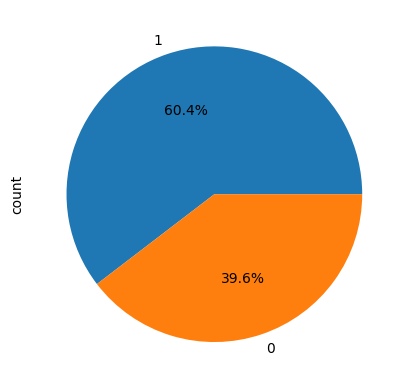

In [ ]:
data["toothed"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

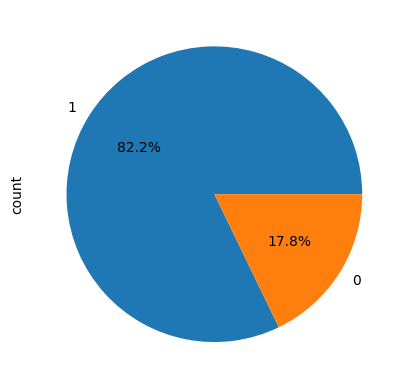

In [ ]:
data["backbone"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

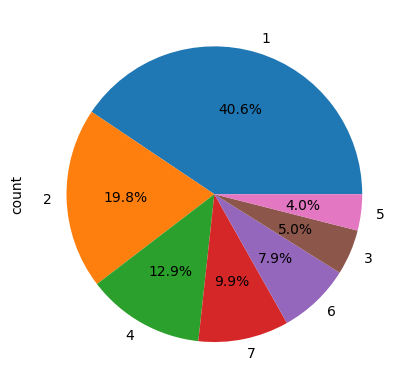

In [ ]:
data["type"].value_counts().plot(kind="pie",autopct="%1.1f%%")

In [ ]:
data["eggs"].value_counts().plot(kind="pie",autopct="%1.1f%%")

2

<Axes: xlabel='aquatic'>

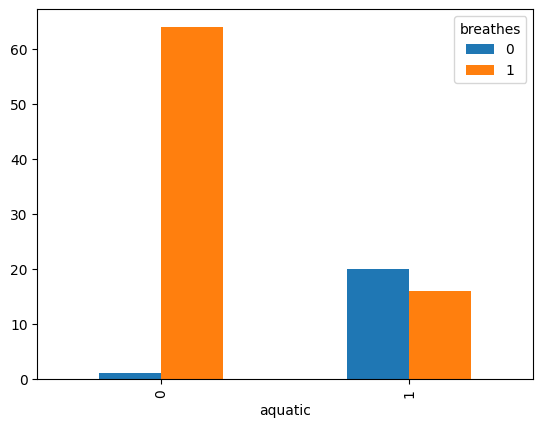

In [ ]:
pd.crosstab(data.aquatic,data.breathes).plot(kind="bar")

<Axes: xlabel='toothed'>

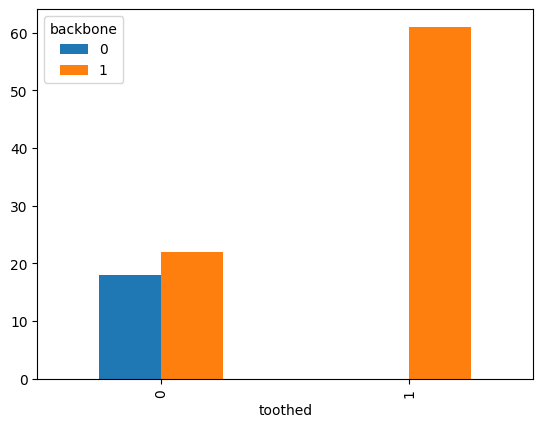

In [ ]:
pd.crosstab(data.toothed,data.backbone).plot(kind="bar")

### Checking for Null values

In [ ]:
data.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


### checking for Duplicates

In [ ]:
data[data.duplicated(keep=False)]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [ ]:
data.drop(["animal name"],axis=1,inplace=True)  #Removing unnecesary columns

In [ ]:
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Splitting Data into Training and Testing sets

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=66)

## Applying Model

In [ ]:
model = KNeighborsClassifier(n_neighbors=17)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy                                 #accuracy we got 68%.we need to improve the accuracy with the best parameter values.

0.6774193548387096

## Parameters Tuning

In [ ]:
n_neighbors = np.array(range(3,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8714285714285713
{'n_neighbors': 3}


## Implemtation of Model with Best parameters

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=model.predict(x_test)

## Evaluation Metrics

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8064516129032258

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.40      0.57         5

    accuracy                           0.81        31
   macro avg       0.65      0.63      0.61        31
weighted avg       0.83      0.81      0.79        31



## Conclusion

Finally we have implemented K-Nearest Neighour supervised algorithm with best parameters and we got the accuracy of 81%.